In [14]:
from ultralytics import YOLO
from ultralytics.utils import YAML

import torch
import numpy as np
from ultralytics.utils import DEFAULT_CFG
from ultralytics.data.utils import check_cls_dataset, check_det_dataset

# DEFAULT_CFG = YAML.load('default.yaml')

from ultralytics.utils import DEFAULT_CFG
DEFAULT_CFG.imgsz
DEFAULT_CFG.augment = False

In [15]:

file = 'pseudo_AFDET_dataset.yaml'
# results = model.train(data='AFDET_dataset.yaml', epochs=1, imgsz=250)
data = YAML.load(file)  # dictionary
data


{'path': '/media/kaizen/T7/Project/final_project/Project/Dataset/pseudo_labeled_dataset/',
 'train': 'images/train',
 'val': 'images/val',
 'names': {0: 'scratch', 1: 'paint_peel', 2: 'rust', 3: 'rivet_damage'}}

In [16]:

data = check_det_dataset(file)
data

{'path': PosixPath('/media/kaizen/T7/Project/final_project/Project/Dataset/pseudo_labeled_dataset'),
 'train': '/media/kaizen/T7/Project/final_project/Project/Dataset/pseudo_labeled_dataset/images/train',
 'val': '/media/kaizen/T7/Project/final_project/Project/Dataset/pseudo_labeled_dataset/images/val',
 'names': {0: 'scratch', 1: 'paint_peel', 2: 'rust', 3: 'rivet_damage'},
 'yaml_file': 'pseudo_AFDET_dataset.yaml',
 'nc': 4,
 'channels': 3}

In [17]:

from ultralytics.data import build_dataloader, build_yolo_dataset
# if you use mode 'train' it'll apply unwanted augmentations
dataset = build_yolo_dataset(DEFAULT_CFG, data['train'], 1, data, mode='val' )
dataset[0].keys()
dataset[0]['img'].shape

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 101.4±29.7 MB/s, size: 68.5 KB)
val: Scanning /media/kaizen/T7/Project/final_project/Project/Dataset/pseudo_labeled_dataset/labels/train.cache... 5212 images, 1622 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 5212/5212 1.8Git/s 0.0s


torch.Size([3, 640, 640])

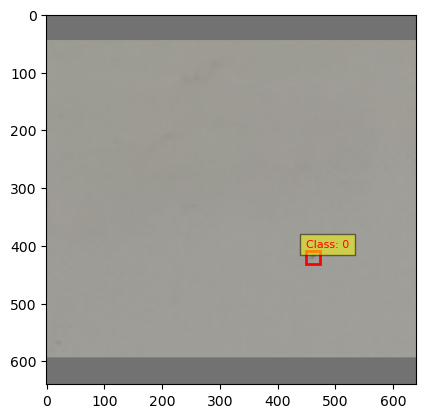

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from PIL import Image
import cv2

sample = dataset[10]
def display_sample(sample):
    fig, pp = plt.subplots(1)


    # Get image (convert from tensor if needed)
    img = sample['img']
    img = img.cpu().numpy().transpose(1, 2, 0)

    # Get bounding boxes and classes
    bboxes = sample.get('bboxes', [])
    cls = sample.get('cls', [])

    pp.imshow(img)

    # Draw bounding boxes (YOLO format: center_x, center_y, width, height normalized)
    h, w = img.shape[:2]
    for bbox, class_id in zip(bboxes, cls):
        cx, cy, bw, bh = bbox[:4]
        x1 = int((cx - bw/2) * w)
        y1 = int((cy - bh/2) * h)
        x2 = int((cx + bw/2) * w)
        y2 = int((cy + bh/2) * h)
        
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, 
                                linewidth=2, edgecolor='r', facecolor='none')
        pp.add_patch(rect)
        pp.text(x1, y1-5, f'Class: {int(class_id)}', 
                        color='red', fontsize=8, bbox=dict(facecolor='yellow', alpha=0.5))

display_sample(sample)

In [19]:
data['names'][0]

'scratch'

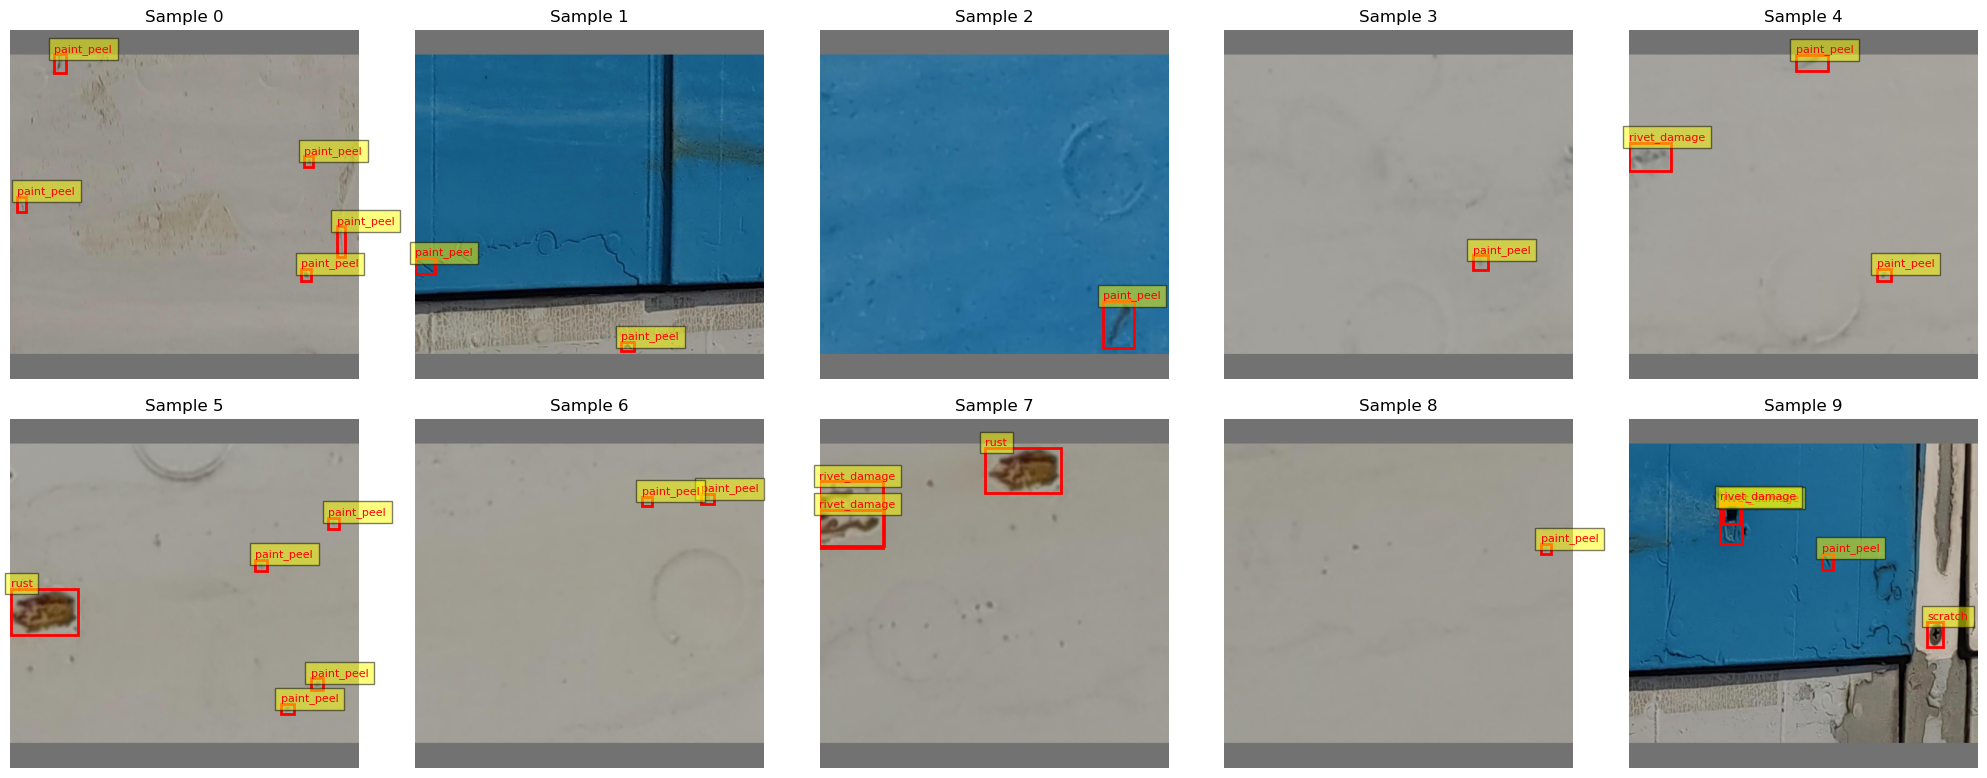

In [11]:
# Get random indices
num_samples = min(10, len(dataset))
# random_indices = random.sample(range(len(dataset)), num_samples)
random_indices = list(range(num_samples))

# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for idx, sample_idx in enumerate(random_indices):
    sample = dataset[sample_idx]
    
    # Get image (convert from tensor if needed)
    img = sample['img']
    if isinstance(img, torch.Tensor):
        img = img.cpu().numpy().transpose(1, 2, 0).astype(np.uint8)
    else:
        img = (img * 255).astype(np.uint8) if img.max() <= 1 else img.astype(np.uint8)
    
    # Get bounding boxes and classes
    bboxes = sample.get('bboxes', [])
    cls = sample.get('cls', [])
    
    # Display image
    axes[idx].imshow(img)
    axes[idx].set_title(f'Sample {sample_idx}')
    axes[idx].axis('off')
    
    # Draw bounding boxes (YOLO format: center_x, center_y, width, height normalized)
    h, w = img.shape[:2]
    for bbox, class_id in zip(bboxes, cls):
        cx, cy, bw, bh = bbox[:4]
        x1 = int((cx - bw/2) * w)
        y1 = int((cy - bh/2) * h)
        x2 = int((cx + bw/2) * w)
        y2 = int((cy + bh/2) * h)
        
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, 
                                linewidth=2, edgecolor='r', facecolor='none')
        axes[idx].add_patch(rect)
        axes[idx].text(x1, y1-5, f'{data["names"][int(class_id)]}', 
                      color='red', fontsize=8, bbox=dict(facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.show()

In [8]:
dataset.labels

[{'im_file': '/media/kaizen/T7/Project/final_project/Project/Dataset/Aircraft_Fuselage_DET2023/aircraft_fuselage_yolo/images/train/002.jpg',
  'shape': (960, 1120),
  'cls': array([[          0],
         [          0],
         [          0],
         [          0],
         [          0]], dtype=float32),
  'bboxes': array([[   0.032143,     0.49687,    0.035714,    0.052083],
         [     0.0625,      0.2224,    0.026786,    0.036458],
         [       0.95,       0.625,    0.035714,     0.11667],
         [     0.8567,     0.35833,    0.022321,    0.035417],
         [    0.84821,     0.73646,    0.028571,      0.0375]], dtype=float32),
  'segments': [],
  'keypoints': None,
  'normalized': True,
  'bbox_format': 'xywh'},
 {'im_file': '/media/kaizen/T7/Project/final_project/Project/Dataset/Aircraft_Fuselage_DET2023/aircraft_fuselage_yolo/images/train/003.jpg',
  'shape': (960, 1120),
  'cls': array([[          0],
         [          0]], dtype=float32),
  'bboxes': array([[   0.

In [20]:

from ultralytics.utils.plotting import plot_labels

train_dataset = build_yolo_dataset(DEFAULT_CFG, data['train'], 1, data, mode='val' )
boxes = np.concatenate([lb["bboxes"] for lb in train_dataset.labels], 0)
cls = np.concatenate([lb["cls"] for lb in train_dataset.labels], 0)
plot_labels(boxes, cls.squeeze(), names=train_dataset.data["names"])

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 65.6±51.6 MB/s, size: 90.7 KB)
val: Scanning /media/kaizen/T7/Project/final_project/Project/Dataset/pseudo_labeled_dataset/labels/train.cache... 5212 images, 1622 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 5212/5212 1.8Git/s 0.0s
Plotting labels to labels.jpg... 


In [11]:
# get max and min box sizes
widths = boxes[:, 2]
heights = boxes[:, 3]
print('width: ', widths.max(), widths.min())
print('height: ', heights.max(), heights.min())

width:  0.478571 0.014286
height:  0.488542 0.016667


276.0 153.0 297.0 139.0


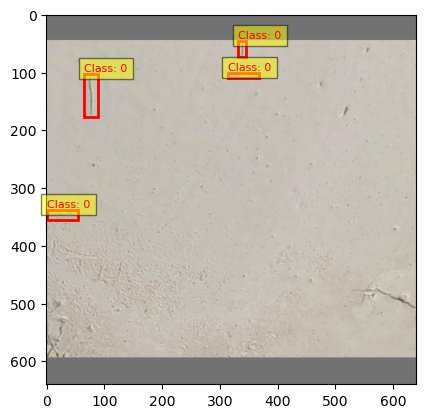

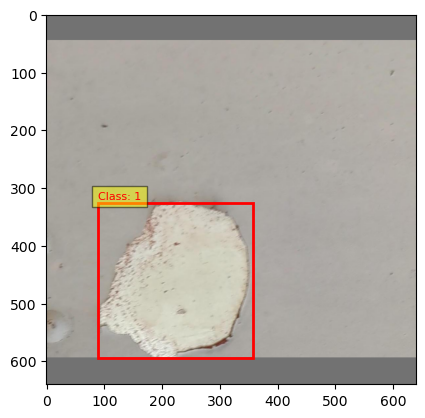

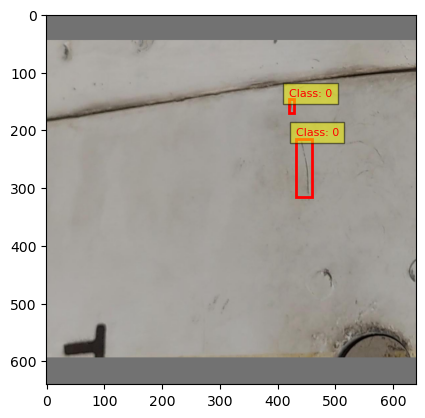

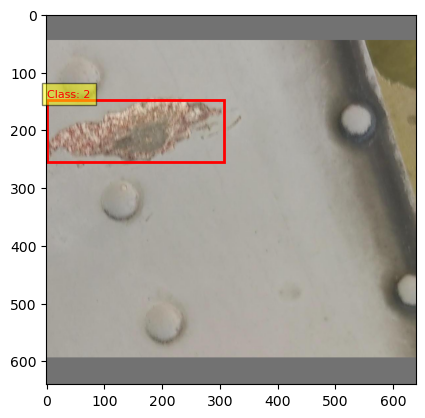

In [12]:
# which image max max and min hight and width
# add dataset id in the last column of boxes
np.array([[0]]*train_dataset.labels[0]['bboxes'].shape[0]).shape
train_dataset.labels[0]['bboxes'].shape
# np.concatenate((train_dataset.labels[0]['bboxes'], np.array([[1]]*train_dataset.labels[0]['bboxes'].shape[0])), 1)
boxes = np.concatenate([np.concatenate((lb["bboxes"], np.array([[i]]*lb["bboxes"].shape[0])), 1) for i, lb in enumerate(train_dataset.labels)] , 0)
# boxes = np.concatenate([boxes, np.array([[i]]*boxes.shape[0]) for i, lb in enumerate(train_dataset.labels)], 0)

# cls = np.concatenate([lb["cls"] for lb in train_dataset.labels], 0)
max_width_idx = np.argmax(widths)
max_width_idx = boxes[max_width_idx, -1]
min_width_idx = np.argmin(widths)
min_width_idx = boxes[min_width_idx, -1]
max_height_idx = np.argmax(heights) 
max_height_idx = boxes[max_height_idx, -1]
min_height_idx = np.argmin(heights)
min_height_idx = boxes[min_height_idx, -1]

print(min_height_idx, max_height_idx, min_width_idx, max_width_idx)

# # plot these images


sample = train_dataset[int(min_height_idx)]
# sample['bboxes']
display_sample(sample)
display_sample(train_dataset[int(max_height_idx)])
display_sample(train_dataset[int(min_width_idx)])
display_sample(train_dataset[int(max_width_idx)])



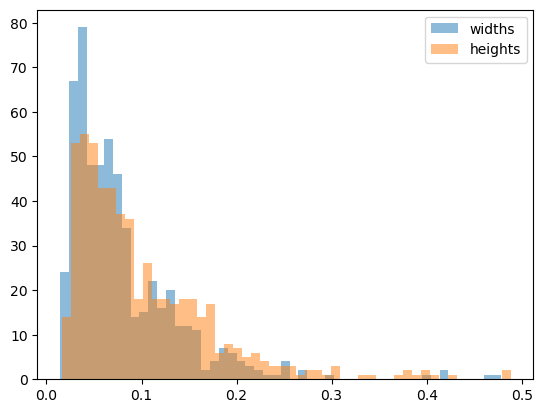

In [89]:
# plt.plot(boxes[:, 2], boxes[:, 3], 'o')
plt.hist(boxes[:, 2], bins=50, alpha=0.5, label='widths')
plt.hist(boxes[:, 3], bins=50, alpha=0.5, label='heights')
plt.legend()